In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import losses,  callbacks

from utilities.aeArchitectures import *
from utilities.analysis import *
from utilities.generatorDS import normalize
from keras.datasets import fashion_mnist

0.0


In [2]:
#Obtencion zip data
data = np.load('zipDataSet.npz')
x_train = data['x_train']
x_test= data['x_test']

#Obtencion data no lossless compression 
(x_trainN, _), (x_testN, _) = fashion_mnist.load_data()
x_trainN = normalize(x_trainN.reshape(x_trainN.shape[0], -1))
x_testN = normalize(x_testN.reshape(x_testN.shape[0], -1))

In [3]:
pol_maxGrade: int = 784
latent_dim: int = 128
neuLayers = [pol_maxGrade, 512, 256]

In [4]:
#Construccion Autoencoder con compressed zip data-----------------------------
autoencoderZip = Autoencoder(latent_dim, neuLayers) #Generacion del modelo

#Compilamos
autoencoderZip.compile(optimizer='adam', loss=losses.MeanSquaredError())

#EarlyStop para que no haga Overfitting
early_stop = callbacks.EarlyStopping(monitor='val_loss',patience=10)

#Entrenamos
history = autoencoderZip.fit(x_train, x_train,
            epochs=35,
            shuffle=True,
            validation_data=(x_test, x_test),
            callbacks=[early_stop])

Epoch 1/35
398/398 [==============================] - 2s 4ms/step - loss: 0.0757 - val_loss: 0.0588
Epoch 2/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0561 - val_loss: 0.0546
Epoch 3/35
398/398 [==============================] - 2s 4ms/step - loss: 0.0511 - val_loss: 0.0531
Epoch 4/35
398/398 [==============================] - 1s 4ms/step - loss: 0.0484 - val_loss: 0.0520
Epoch 5/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0466 - val_loss: 0.0523
Epoch 6/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0455 - val_loss: 0.0515
Epoch 7/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0445 - val_loss: 0.0506
Epoch 8/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0436 - val_loss: 0.0505
Epoch 9/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0432 - val_loss: 0.0502
Epoch 10/35
398/398 [==============================] - 1s 3ms/step - loss: 0.0426 - val_loss: 0.0502

In [5]:
#Construccion auto encoder normal----------------------------------------
autoencoderN = Autoencoder(latent_dim, neuLayers) #Generacion del modelo

#Compilamos
autoencoderN.compile(optimizer='adam', loss=losses.MeanSquaredError())

#EarlyStop para que no haga Overfitting
early_stopN = callbacks.EarlyStopping(monitor='val_loss',patience=10)

#Entrenamos
historyN = autoencoderN.fit(x_trainN, x_trainN,
            epochs=35,
            shuffle=True,
            validation_data=(x_testN, x_testN),
            callbacks=[early_stopN])

Epoch 1/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - val_loss: 0.0199
Epoch 2/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - val_loss: 0.0172
Epoch 3/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 5/35
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 6/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 7/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0139 - val_loss: 0.0139
Epoch 8/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 9/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 10/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

In [6]:
#Obtencion tamaños compresiones
sizes = get_Size(x_train,autoencoderZip.getEncoded(x_train))
#Obtencion tamaños compresiones AE-N
sizesN = get_Size(x_trainN,autoencoderN.getEncoded(x_trainN))
print(sizes)
print(sizesN)

[79723520, 6508160, 7674901, 2922292]
[376320128, 30720128, 42730005, 12165601]


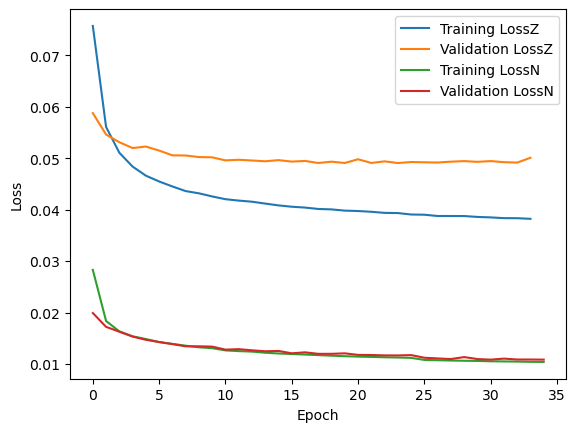

In [7]:
#Resultados Error
loss = history.history['loss']
val_loss = history.history['val_loss']
lossN = historyN.history['loss']
val_lossN = historyN.history['val_loss']
plt.plot(loss, label='Training LossZ')
plt.plot(val_loss, label='Validation LossZ')
plt.plot(lossN, label='Training LossN')
plt.plot(val_lossN, label='Validation LossN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[79723520, 6508160, 7674901, 2922292]
[376320128, 30720128, 42730005, 12165601]


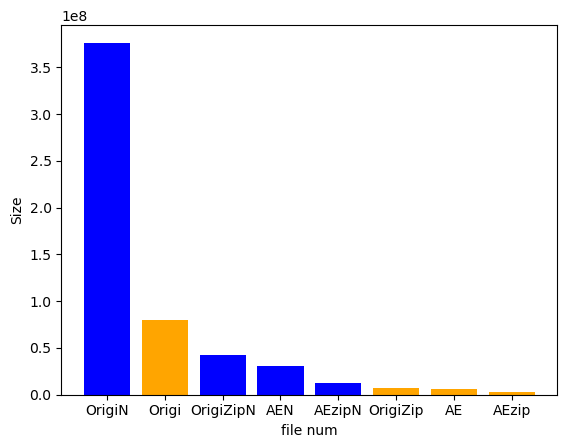

In [8]:
#Resultados Compression    
# Datos originales
labels = [ 'Origi', 'AE', 'OrigiZip','AEzip','OrigiN', 'AEN', 'OrigiZipN','AEzipN']
values = np.concatenate((np.array(sizes),np.array(sizesN)))
print(sizes)
print(sizesN)
# Ordenar los datos
sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
sorted_labels = [labels[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Asignar colores
colors = ['blue' if label.endswith('N') else 'orange' for label in sorted_labels]

# Crear el gráfico de barras
plt.bar(sorted_labels, sorted_values, color=colors)
plt.xlabel('file num')
plt.ylabel('Size')
plt.show()